In [2]:
url= 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
import os

In [4]:
os.path.basename(url)

'housing.tgz'

In [5]:
file_path=r"D:\Project\machine_learning_project\config"

In [8]:
os.listdir(file_path)[0]

'config.yaml'

In [1]:
## Data Ingestion

In [1]:
import pandas as pd

In [3]:
csv_file_path=r"C:\\Users\\pallavi.saxena\\Documents\\Mine\\iNeuron\\FullStackDataScienceNovember2021\\LiveSession\\MLProject\\Project1\\codebase\\Machine_Learning_Project\\housing\\artifact\\data_ingestion\\2022-08-28-20-54-49\\ingested_data\\train\\housing.csv"
housing_data_frame=pd.read_csv(csv_file_path)

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

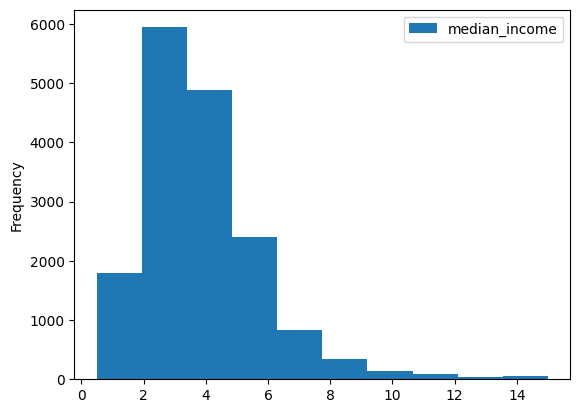

In [5]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [6]:
import numpy as np

In [8]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [9]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [10]:
housing_data_frame.income_cat.value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

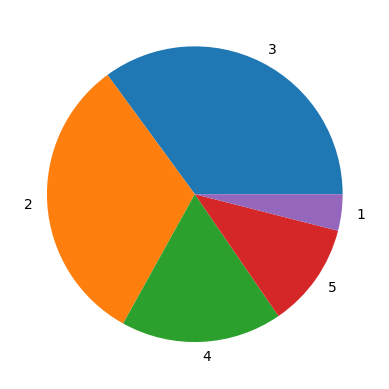

In [11]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [15]:
for train_ix,test_ix in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[16060 15339    17 ...  6713 12794  1913] [ 3012  6966 13328 ... 13662  1795 14256]


In [16]:
train_df=housing_data_frame.loc[train_ix]

In [17]:
housing_data_frame.shape

(16512, 11)

In [18]:
train_df.shape

(13209, 11)

In [19]:
test_df=housing_data_frame.loc[test_ix]

In [20]:
test_df.shape

(3303, 11)

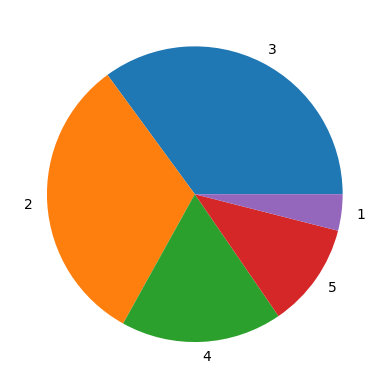

In [21]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

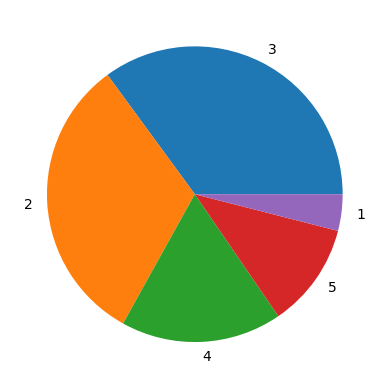

In [22]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()

In [23]:
housing_data_frame.dtypes.index,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [24]:
data_type = list(map(lambda x:str(x).replace("dtype('","").replace("')","") ,housing_data_frame.dtypes.values))

In [25]:
column=housing_data_frame.columns

In [26]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}